In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df2 = pd.read_csv('cleaned_dataset/dataset2_cleaned.csv')
df1 = pd.read_csv('cleaned_dataset/dataset1_cleaned.csv')

In [214]:
df2.dtypes

time                   object
month                   int64
hours_after_sunset    float64
bat_landing_number      int64
food_availability     float64
rat_minutes           float64
rat_arrival_number      int64
rat_present             int64
dtype: object

In [215]:
df2['time'] = pd.to_datetime(df2['time'])
df2.isnull().sum()

df2.groupby('month')[['bat_landing_number','rat_arrival_number','food_availability']].sum()

,bat_landing_number,rat_arrival_number,food_availability
month,,,
0,4375,17,373.496207
1,9264,32,675.777387
2,18708,161,1012.526971
3,4980,22,302.332736
4,20095,331,1485.873359
5,10203,381,1325.238104
6,488,0,17.346646


<Axes: >

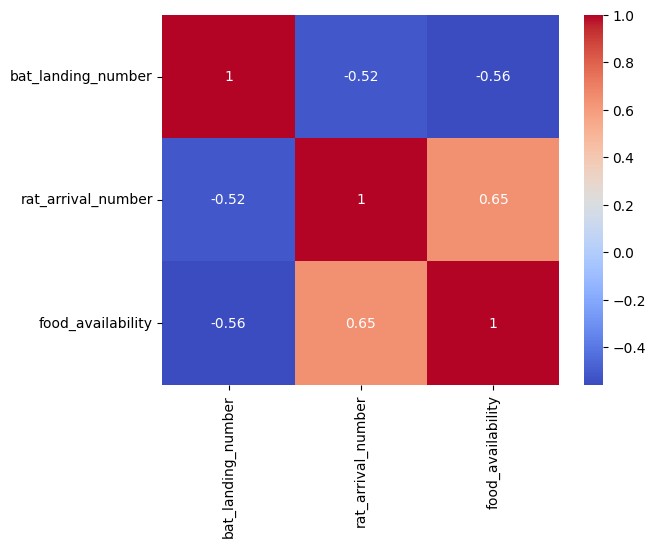

In [216]:
sns.heatmap(df2.groupby('month')[['bat_landing_number','rat_arrival_number','food_availability']].mean().corr(), annot= True, cmap = 'coolwarm', xticklabels=df2.groupby('month')[['bat_landing_number','rat_arrival_number','food_availability']].mean().corr().index)

<Axes: xlabel='month'>

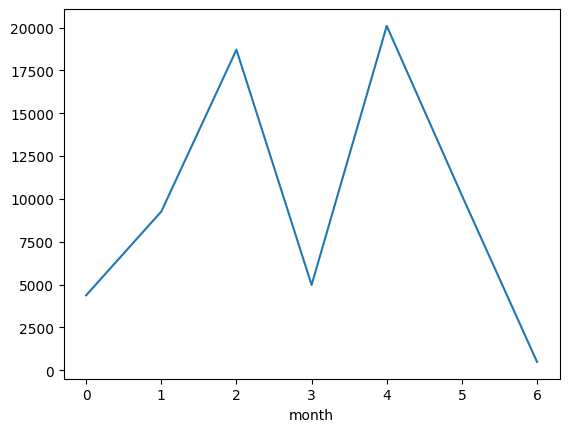

In [217]:
df2.groupby('month')['bat_landing_number'].sum().plot()

<Axes: xlabel='month'>

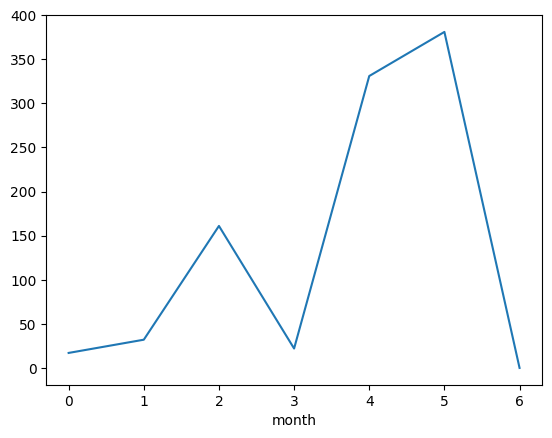

In [218]:
df2.groupby('month')['rat_arrival_number'].sum().plot()

<Axes: xlabel='month'>

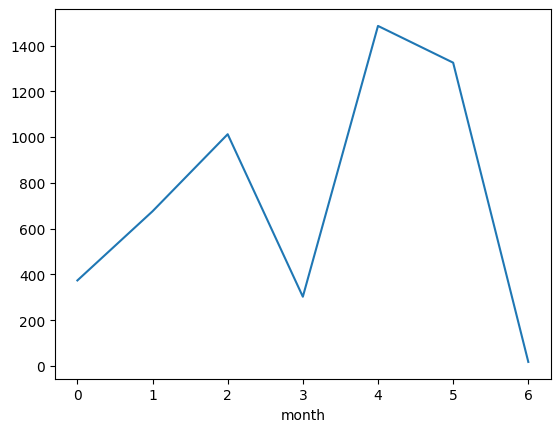

In [219]:
df2.groupby('month')['food_availability'].sum().plot()

In [220]:
df2.corr(numeric_only=True)

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
month,1.000000,-0.060454,-0.158037,0.063228,0.200732,0.207742,0.245830
hours_after_sunset,-0.060454,1.000000,-0.142074,-0.841611,0.123417,0.085692,0.116913
bat_landing_number,-0.158037,-0.142074,1.000000,0.104762,-0.146228,-0.073536,-0.101246
food_availability,0.063228,-0.841611,0.104762,1.000000,-0.055910,-0.033639,-0.071053
rat_minutes,0.200732,0.123417,-0.146228,-0.055910,1.000000,0.585241,0.499680
rat_arrival_number,0.207742,0.085692,-0.073536,-0.033639,0.585241,1.000000,0.742544
rat_present,0.245830,0.116913,-0.101246,-0.071053,0.499680,0.742544,1.000000


<Axes: >

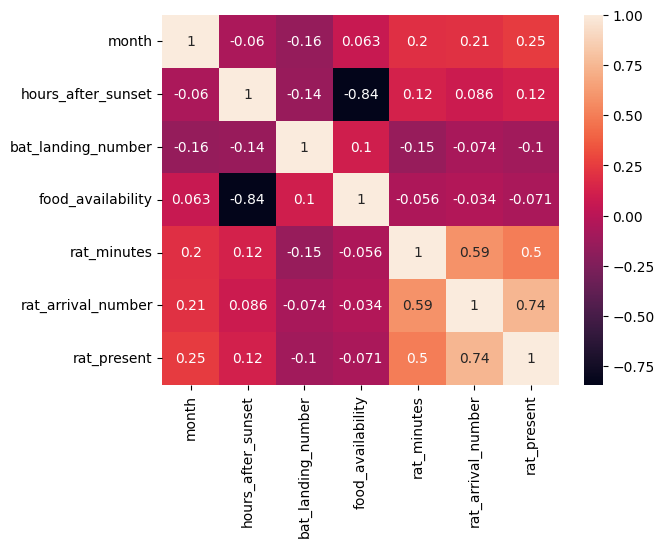

In [221]:
sns.heatmap(df2.corr(numeric_only=True),annot=True)

# Dataset 1

In [222]:
df1 = pd.read_csv('cleaned_dataset/dataset1_cleaned.csv')

In [223]:
df1.dtypes

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
avoidance_behavior             int64
interaction_type              object
rat_present                    int64
dtype: object

<Axes: ylabel='bat_landing_to_food'>

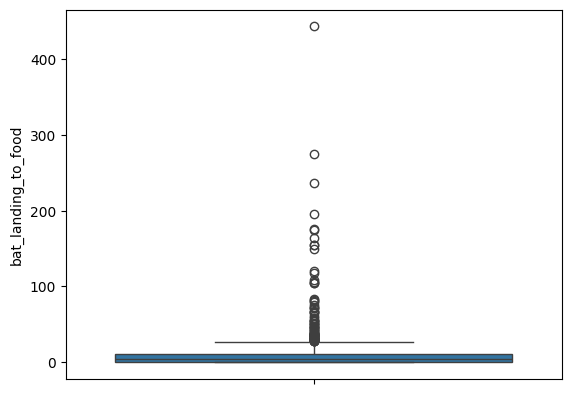

In [224]:
sns.boxplot(y = 'bat_landing_to_food', data=df1)

In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      907 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
 12  avoidance_behavior         907 non-null    int64  
 13  interaction_type           907 non-null    object 

In [226]:
df1.habit.value_counts()

habit
fast                                                245
rat                                                 221
pick                                                139
unknown                                              41
bat                                                  30
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Length: 82, dtype: int64

In [227]:
df1[df1.habit.isnull()]

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,avoidance_behavior,interaction_type,rat_present


<Axes: >

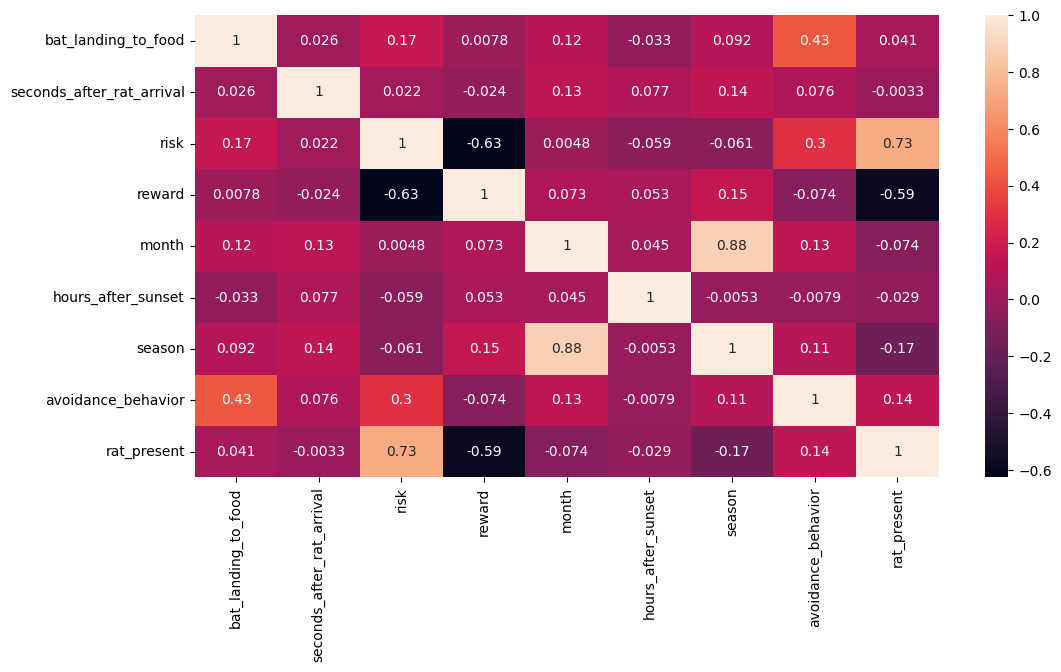

In [228]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(numeric_only = True),annot = True)

In [229]:
dataset1 = df1.copy()

In [230]:
dataset1.risk.value_counts()

risk
0    458
1    449
Name: count, dtype: int64

In [231]:
dataset1.reward.value_counts()

reward
1    484
0    423
Name: count, dtype: int64

In [232]:
dataset1[(dataset1['reward'] == 1) & (dataset1['risk'] == 1)]

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,avoidance_behavior,interaction_type,rat_present
21,2017-12-28 19:45:00,15.0,pick_and_others,2017-12-28 19:35:00,2017-12-28 19:46:00,564,1,1,0,2017-12-28 16:44:00,3.021667,0,1,no_rat,0
47,2018-01-28 20:05:00,7.0,pick_rat,2018-01-28 19:56:00,2018-01-28 20:10:00,545,1,1,1,2018-01-28 17:10:00,2.919722,0,1,predation_fear,1
71,2018-02-10 00:44:00,21.0,pick_bat,2018-02-10 00:43:00,2018-02-10 00:45:00,65,1,1,2,2018-02-09 17:21:00,7.387222,0,1,no_rat,0
171,2018-03-20 02:11:00,4.0,rat_pick,2018-03-20 02:11:00,2018-03-20 02:11:00,46,1,1,3,2018-03-19 17:51:00,8.347222,1,0,predation_fear,1
244,2018-04-26 21:25:00,68.0,pick_and_all,2018-04-26 21:24:00,2018-04-26 21:26:00,19,1,1,4,2018-04-26 19:17:00,2.135000,1,1,no_rat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2018-05-03 23:49:00,22.0,rat_and_bat_and_pick,2018-05-03 23:46:00,2018-05-03 23:52:00,200,1,1,5,2018-05-03 19:22:00,4.460278,1,1,predation_fear,1
891,2018-05-04 02:58:00,76.0,all_pick,2018-05-04 02:55:00,2018-05-04 03:14:00,157,1,1,5,2018-05-03 19:22:00,7.608889,1,1,no_rat,0
894,2018-05-04 03:02:00,67.0,all_pick,2018-05-04 02:55:00,2018-05-04 03:14:00,395,1,1,5,2018-05-03 19:22:00,7.675000,1,1,no_rat,0
897,2018-05-04 03:05:00,6.0,pick_bat,2018-05-04 02:55:00,2018-05-04 03:14:00,593,1,1,5,2018-05-03 19:22:00,7.730000,1,1,no_rat,0


In [233]:
dataset1[~((dataset1['reward'] == 1) & (dataset1['risk'] == 1))]

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,avoidance_behavior,interaction_type,rat_present
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0,1,predation_fear,1
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0,0,no_rat,0
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0,0,no_rat,0
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0,1,predation_fear,1
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0,1,predation_fear,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.981389,1,0,predation_fear,1
902,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.933333,1,0,predation_fear,1
903,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.947500,1,0,no_rat,0
904,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.957222,1,1,no_rat,0


In [234]:
dataset1.habit.unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', 'unknown',
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eati

In [235]:
dataset1[dataset1['habit'] != 'fast']['bat_landing_to_food'].describe()

count    662.000000
mean      15.356465
std       31.570510
min        0.010238
25%        2.000000
50%        6.000000
75%       17.000000
max      443.000000
Name: bat_landing_to_food, dtype: float64

In [236]:
dataset1[dataset1['habit'] == 'fast']['bat_landing_to_food'].describe()

count    245.000000
mean       1.868706
std        2.054222
min        0.010696
25%        1.000000
50%        1.000000
75%        3.000000
max       19.000000
Name: bat_landing_to_food, dtype: float64

<Axes: ylabel='Frequency'>

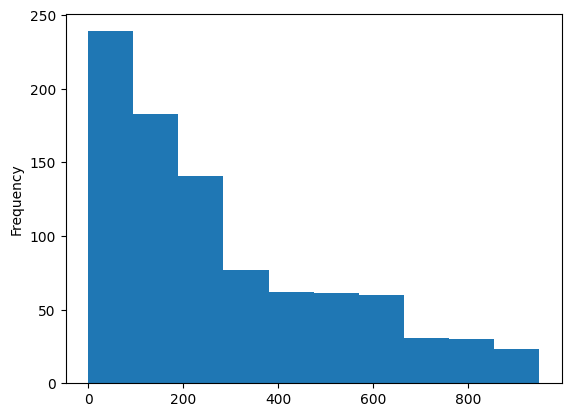

In [237]:
dataset1['seconds_after_rat_arrival'].plot(kind= 'hist')

In [238]:
df2[df2['rat_minutes'] > 0]

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
9,2017-12-26 20:43:00,0,4.0,51,2.968874,1.283333,2,1
10,2017-12-26 21:13:00,0,4.5,53,2.561404,4.866667,1,1
11,2017-12-26 21:43:00,0,5.0,47,2.086587,7.900000,1,1
12,2017-12-26 22:13:00,0,5.5,75,2.000000,0.133333,1,1
18,2017-12-27 01:13:00,0,8.5,16,0.000000,6.683333,1,1
...,...,...,...,...,...,...,...,...
2058,2018-05-21 23:05:00,5,3.5,41,2.000000,3.616667,2,1
2060,2018-05-22 00:05:00,5,4.5,20,2.000000,4.700000,1,1
2063,2018-05-22 01:35:00,5,6.0,19,1.992196,1.250000,1,1
2064,2018-05-22 02:05:00,5,6.5,27,1.677419,1.266667,1,1


In [239]:
dataset1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,avoidance_behavior,interaction_type,rat_present
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0,1,predation_fear,1
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0,0,no_rat,0
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0,0,no_rat,0
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0,1,predation_fear,1
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0,1,predation_fear,1


<Axes: xlabel='season'>

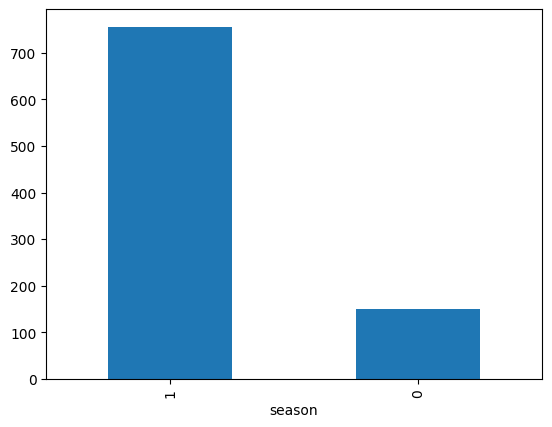

In [240]:
dataset1.season.value_counts().plot(kind = 'bar')

<Axes: xlabel='month'>

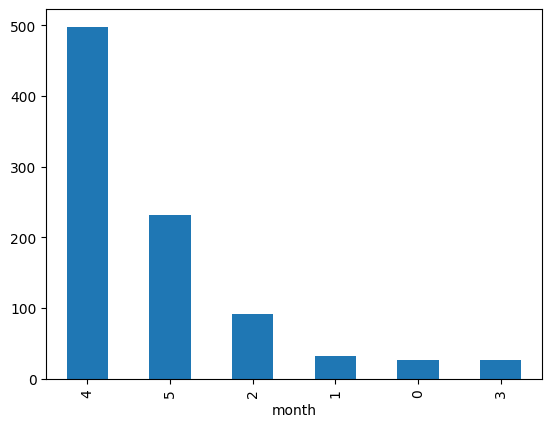

In [241]:
dataset1.month.value_counts().plot(kind = 'bar')

In [242]:
hue_df = dataset1.groupby('season')['month'].value_counts().reset_index()
hue_df

,season,month,count
0,0,2,92
1,0,1,33
2,0,0,26
3,1,4,498
4,1,5,232
5,1,3,26


<Axes: xlabel='month', ylabel='count'>

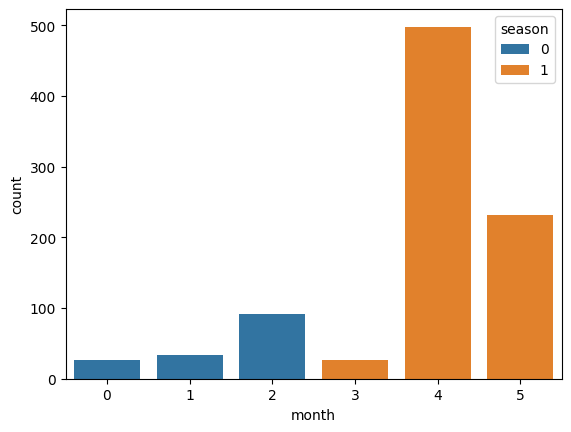

In [243]:
sns.barplot(data=hue_df, x='month', y='count', hue='season')

In [244]:
dataset1['start_time'] = pd.to_datetime(dataset1['start_time'])

In [245]:
dataset1[dataset1.start_time.duplicated()]
dataset1[dataset1.start_time.duplicated()]

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,avoidance_behavior,interaction_type,rat_present
2,2017-12-30 19:51:00,4.0,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0,0,no_rat,0
5,2017-12-30 19:54:00,24.0,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,215,1,0,0,2017-12-30 16:45:00,3.155833,0,1,predation_fear,1
6,2017-12-30 19:54:00,13.0,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,253,1,0,0,2017-12-30 16:45:00,3.166389,0,1,predation_fear,1
8,2017-12-26 21:24:00,6.0,pick,2017-12-26 21:22:00,2017-12-26 21:27:00,113,0,1,0,2017-12-26 16:43:00,4.691389,0,1,no_rat,0
9,2017-12-26 21:24:00,3.0,fast,2017-12-26 21:22:00,2017-12-26 21:27:00,121,0,1,0,2017-12-26 16:43:00,4.693611,0,0,no_rat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2018-05-04 02:58:00,1.0,fast,2018-05-04 02:55:00,2018-05-04 03:14:00,164,0,1,5,2018-05-03 19:22:00,7.610833,1,0,no_rat,0
897,2018-05-04 03:05:00,6.0,pick_bat,2018-05-04 02:55:00,2018-05-04 03:14:00,593,1,1,5,2018-05-03 19:22:00,7.730000,1,1,no_rat,0
899,2018-05-04 03:06:00,5.0,rat,2018-05-04 02:55:00,2018-05-04 03:14:00,636,1,0,5,2018-05-03 19:22:00,7.741944,1,0,predation_fear,1
903,2018-05-04 04:18:00,1.0,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.947500,1,0,no_rat,0


In [246]:
df2['season'] = np.where(df2['month'] >= 3, 1,0)
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present,season
0,2017-12-26 16:13:00,0,-0.5,20,4.000000,0.0,0,0,0
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0,0
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0,0
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0,0
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
2118,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0,1
2119,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0,1
2120,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0,1
2121,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0,1


<Axes: xlabel='month', ylabel='count'>

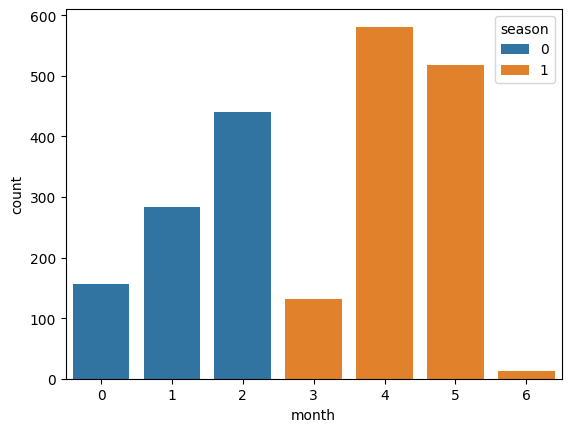

In [247]:
sns.barplot(data=df2.groupby('season')['month'].value_counts().reset_index(), x='month', y='count', hue='season')

# Seasonal Hypothesis Testing based on Investigation 1

In [248]:
winter_season = dataset1[dataset1['season'] == 0]
spring_season = dataset1[dataset1['season'] == 1]

In [249]:
winter_season.describe()

,start_time,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season,avoidance_behavior,rat_present
count,151,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,2018-01-31 07:20:44.900662528,6.039623,207.470199,0.562914,0.364238,1.437086,5.560723,0.0,0.284768,0.523179
min,2017-12-26 20:57:00,0.010696,2.000000,0.000000,0.000000,0.000000,0.247778,0.0,0.000000,0.000000
25%,2018-01-27 23:48:00,1.000000,68.000000,0.000000,0.000000,1.000000,3.027639,0.0,0.000000,0.000000
50%,2018-02-08 02:06:00,2.000000,146.000000,1.000000,0.000000,2.000000,5.168333,0.0,0.000000,1.000000
75%,2018-02-11 01:31:30,6.000000,248.000000,1.000000,1.000000,2.000000,7.487222,0.0,1.000000,1.000000
max,2018-02-20 03:10:00,155.000000,933.000000,1.000000,1.000000,2.000000,12.091944,0.0,1.000000,1.000000
std,NaN,13.960667,206.770978,0.497677,0.482817,0.770940,2.791883,0.0,0.452806,0.501125


In [250]:
spring_season.describe()

,start_time,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season,avoidance_behavior,rat_present
count,756,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.0,756.000000,756.000000
mean,2018-04-25 22:54:42.777777664,12.846335,297.939153,0.481481,0.567460,4.272487,5.526099,1.0,0.429894,0.306878
min,2018-03-18 21:37:00,0.010238,0.000000,0.000000,0.000000,3.000000,-0.261667,1.0,0.000000,0.000000
25%,2018-04-21 02:17:00,1.000000,99.000000,0.000000,0.000000,4.000000,3.825208,1.0,0.000000,0.000000
50%,2018-04-28 01:06:00,4.000000,228.000000,0.000000,1.000000,4.000000,5.703333,1.0,0.000000,0.000000
75%,2018-05-02 00:47:30,13.250000,457.250000,1.000000,1.000000,5.000000,7.388333,1.0,1.000000,1.000000
max,2018-05-31 23:34:00,443.000000,949.000000,1.000000,1.000000,5.000000,10.698889,1.0,1.000000,1.000000
std,NaN,29.506111,244.589591,0.499988,0.495756,0.517083,2.333436,0.0,0.495389,0.461504


In [251]:
with_rats = winter_season[winter_season['rat_present'] == 1]['bat_landing_to_food']
without_rats = winter_season[winter_season['rat_present'] == 0]['bat_landing_to_food']

# H1: Bat Avoidance Behaviour (Winter)
**Hypothesis:** Bats will delay their approach to a food source when rats are present.
- **Null Hypothesis (H₀):** There is no difference in the time it takes for bats to land and feed, regardless of whether rats are present.
- **Alternative Hypothesis (H₁):** Bats take significantly longer to land and feed when rats are present.

**Test:** Mann-Whitney U test and T-test on `bat_landing_to_food` time.


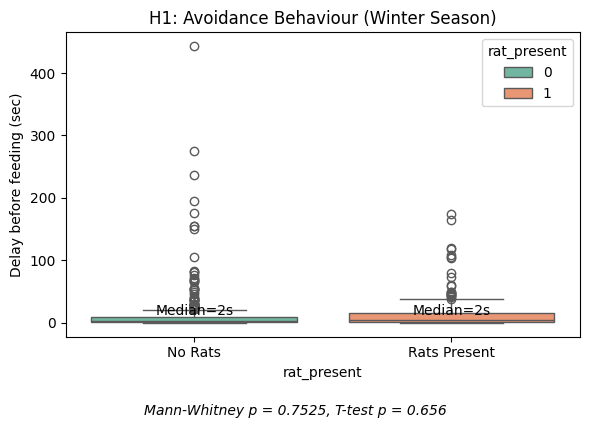

In [252]:
med_no = without_rats.median()
med_yes = with_rats.median()

# Run stats
t_stat, pval_t = ttest_ind(with_rats, without_rats, equal_var=False, nan_policy='omit')
u_stat, pval_u = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

# Boxplot with annotations
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='rat_present', y='bat_landing_to_food', hue='rat_present',data=dataset1, palette="Set2")
plt.xticks([0,1], ['No Rats','Rats Present'])
plt.ylabel("Delay before feeding (sec)")
plt.title("H1: Avoidance Behaviour")

# Annotate medians & p-value
plt.text(0, med_no+10, f"Median={med_no:.0f}s", ha='center', color="black")
plt.text(1, med_yes+10, f"Median={med_yes:.0f}s", ha='center', color="black")

plt.figtext(0.5, -0.05, f"Mann-Whitney p = {pval_u:.4f}, T-test p = {pval_t:.3f}",
            ha="center", fontsize=10, style="italic")
plt.title("H1: Avoidance Behaviour (Winter Season)")

plt.tight_layout()
plt.show()

In [253]:
print(f"T-test result:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {pval_t:.4f}")
print("="*50)

print("Mann–Whitney U test result:")
print(f"  U-statistic = {u_stat:.4f}")
print(f"  p-value     = {pval_u:.4f}")

T-test result:
  t-statistic = -0.4468
  p-value     = 0.6561
Mann–Whitney U test result:
  U-statistic = 2928.0000
  p-value     = 0.7525


**Conclusion (Winter):**
The p-value from the Mann-Whitney U test is greater than 0.05. Therefore, we **fail to reject the null hypothesis**. There is not enough statistical evidence to suggest that bats delay their feeding in the presence of rats during the winter.

### H1: Bat Avoidance Behaviour (Spring)
**Hypothesis:** Bats will delay their approach to a food source when rats are present.
- **Null Hypothesis (H₀):** There is no difference in the time it takes for bats to land and feed, regardless of whether rats are present.
- **Alternative Hypothesis (H₁):** Bats take significantly longer to land and feed when rats are present.

**Test:** Mann-Whitney U test and T-test on `bat_landing_to_food` time.

In [254]:
with_rats = spring_season[spring_season['rat_present'] == 1]['bat_landing_to_food']
without_rats = spring_season[spring_season['rat_present'] == 0]['bat_landing_to_food']

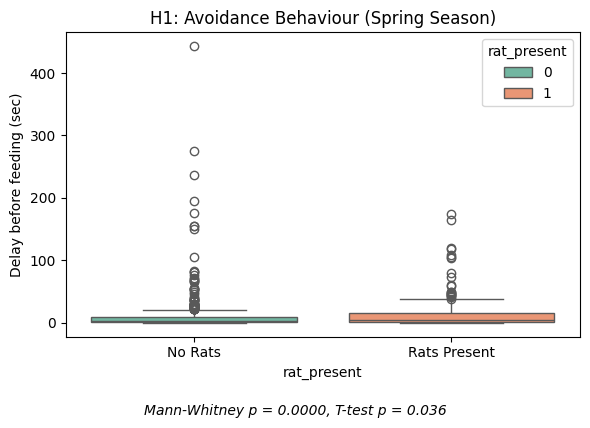

In [255]:
med_no = without_rats.median()
med_yes = with_rats.median()

# Run stats
t_stat, pval_t = ttest_ind(with_rats, without_rats, equal_var=False, nan_policy='omit')
u_stat, pval_u = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

# Boxplot with annotations
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='rat_present', y='bat_landing_to_food', hue='rat_present',data=dataset1, palette="Set2")
plt.xticks([0,1], ['No Rats','Rats Present'])
plt.ylabel("Delay before feeding (sec)")
plt.title("H1: Avoidance Behaviour")

# Annotate medians & p-value
# plt.text(0, med_no+10, f"Median={med_no:.0f}s", ha='center', color="black")
# plt.text(1, med_yes+10, f"Median={med_yes:.0f}s", ha='center', color="black")
plt.title("H1: Avoidance Behaviour (Spring Season)")
plt.figtext(0.5, -0.05, f"Mann-Whitney p = {pval_u:.4f}, T-test p = {pval_t:.3f}",
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

In [256]:
print(f"T-test result:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {pval_t:.4f}")
print("="*50)

print("Mann–Whitney U test result:")
print(f"  U-statistic = {u_stat:.4f}")
print(f"  p-value     = {pval_u:.4f}")

T-test result:
  t-statistic = 2.0977
  p-value     = 0.0364
Mann–Whitney U test result:
  U-statistic = 74819.0000
  p-value     = 0.0000


**Conclusion (Spring):**
The p-value from the Mann-Whitney U test is less than 0.05. Therefore, we **reject the null hypothesis**. There is a statistically significant delay in bat feeding times when rats are present during the spring.

C:\Users\Acer\AppData\Local\Temp\ipykernel_51252\755448801.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No Rats', 'Rats Present'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_51252\755448801.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Rats', 'Rats Present'])


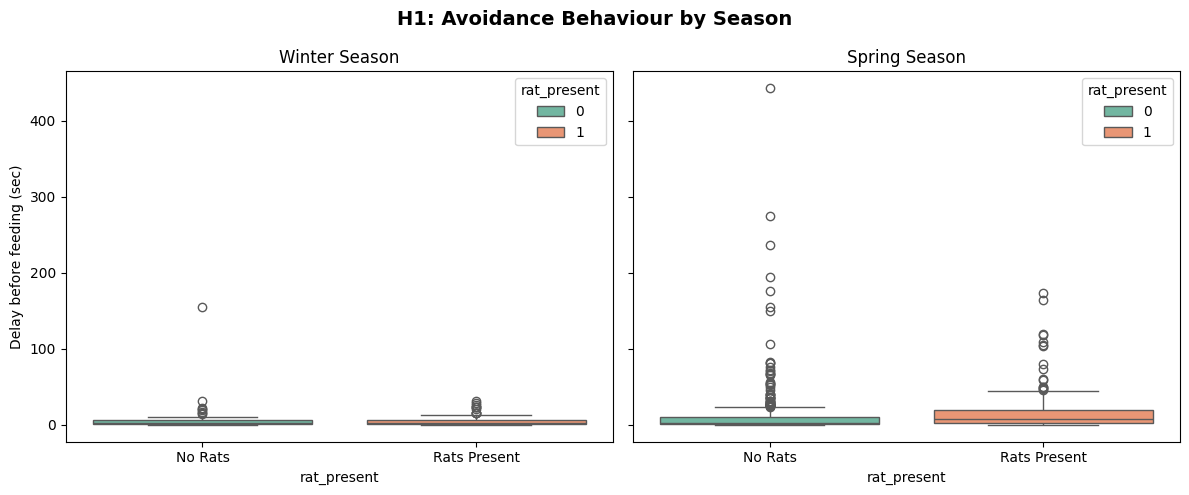

In [257]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Winter ---
sns.boxplot(ax=axes[0], x='rat_present', y='bat_landing_to_food', hue='rat_present',
            data=winter_season, palette="Set2")
axes[0].set_title("Winter Season")
axes[0].set_xticklabels(['No Rats', 'Rats Present'])
axes[0].set_ylabel("Delay before feeding (sec)")

# --- Spring ---
sns.boxplot(ax=axes[1], x='rat_present', y='bat_landing_to_food', hue='rat_present',
            data=spring_season, palette="Set2")
axes[1].set_title("Spring Season")
axes[1].set_xticklabels(['No Rats', 'Rats Present'])
axes[1].set_ylabel("")

fig.suptitle("H1: Avoidance Behaviour by Season", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### H2: Bat Interaction Types (Winter)
**Hypothesis:** The presence of rats alters the types of interactions bats have with the food source (e.g., more 'pick' and 'gaze' behaviours, fewer 'eating' events).
- **Null Hypothesis (H₀):** The distribution of bat interaction types is independent of rat presence.
- **Alternative Hypothesis (H₁):** The distribution of bat interaction types is dependent on rat presence.

**Test:** Chi-square test of independence on `interaction_type` vs. `rat_present`.

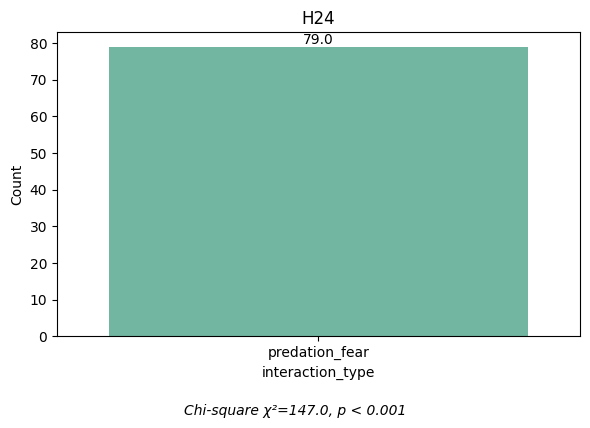

In [258]:
contingency = pd.crosstab(winter_season['rat_present'], winter_season['interaction_type'])
chi2, pval_chi, dof, expected = chi2_contingency(contingency)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='interaction_type',
                       hue='interaction_type',
                   data=winter_season[winter_season['rat_present']==1],
                   palette="Set2")

plt.title("H24")
plt.ylabel("Count")

# Annotate bar values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.figtext(0.5, -0.05, f"Chi-square χ²={chi2:.1f}, p < 0.001",
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

In [259]:
print("Chi-square Test Results:")
print(f"  Chi-square statistic = {chi2:.4f}")
print(f"  Degrees of freedom   = {dof}")
print(f"  p-value              = {pval_chi:.4f}")
print("  Expected frequencies:")
print(expected)

Chi-square Test Results:
  Chi-square statistic = 147.0180
  Degrees of freedom   = 1
  p-value              = 0.0000
  Expected frequencies:
[[34.33112583 37.66887417]
 [37.66887417 41.33112583]]


**Conclusion (Winter):**
The p-value from the Chi-square test is greater than 0.05. Therefore, we **fail to reject the null hypothesis**. There is no statistically significant association between rat presence and the type of bat interactions during the winter.

### H2: Bat Interaction Types (Spring)
**Hypothesis:** The presence of rats alters the types of interactions bats have with the food source.
- **Null Hypothesis (H₀):** The distribution of bat interaction types is independent of rat presence.
- **Alternative Hypothesis (H₁):** The distribution of bat interaction types is dependent on rat presence.

**Test:** Chi-square test of independence on `interaction_type` vs. `rat_present`.

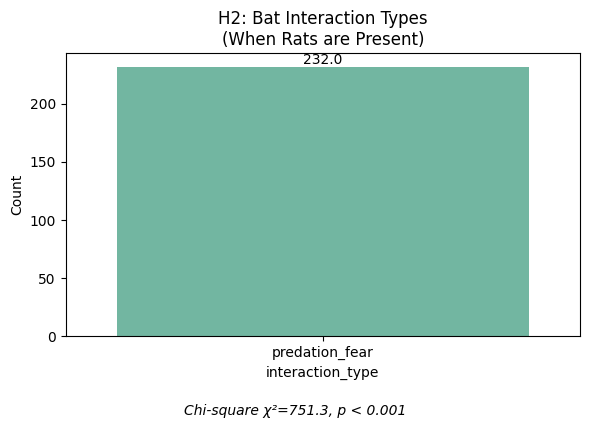

In [260]:
contingency = pd.crosstab(spring_season['rat_present'], spring_season['interaction_type'])
chi2, pval_chi, dof, expected = chi2_contingency(contingency)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='interaction_type',
                       hue='interaction_type',
                   data=spring_season[spring_season['rat_present']==1],
                   palette="Set2")

plt.title("H2: Bat Interaction Types\n(When Rats are Present)")
plt.ylabel("Count")

# Annotate bar values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.figtext(0.5, -0.05, f"Chi-square χ²={chi2:.1f}, p < 0.001",
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

In [261]:
print("Chi-square Test Results:")
print(f"  Chi-square statistic = {chi2:.4f}")
print(f"  Degrees of freedom   = {dof}")
print(f"  p-value              = {pval_chi:.4f}")
print("  Expected frequencies:")
print(expected)


Chi-square Test Results:
  Chi-square statistic = 751.3059
  Degrees of freedom   = 1
  p-value              = 0.0000
  Expected frequencies:
[[363.1957672 160.8042328]
 [160.8042328  71.1957672]]


**Conclusion (Spring):**
The p-value from the Chi-square test is less than 0.05. Therefore, we **reject the null hypothesis**. There is a statistically significant association between rat presence and the type of bat interactions during the spring.

### H3: Colony Activity Reduction (Winter)
**Hypothesis:** The presence of rats reduces overall bat colony activity, measured by the number of bat landings.
- **Null Hypothesis (H₀):** The mean number of bat landings is the same whether rats are present or not.
- **Alternative Hypothesis (H₁):** The mean number of bat landings is lower when rats are present.

**Test:** Mann-Whitney U test and T-test on `bat_landing_number`.

In [262]:
df2['rat_present'] = np.where(df2['rat_minutes']>1,1,0)

In [263]:
winter_season = df2[df2['season'] == 0]
spring_season = df2[df2['season'] == 1]

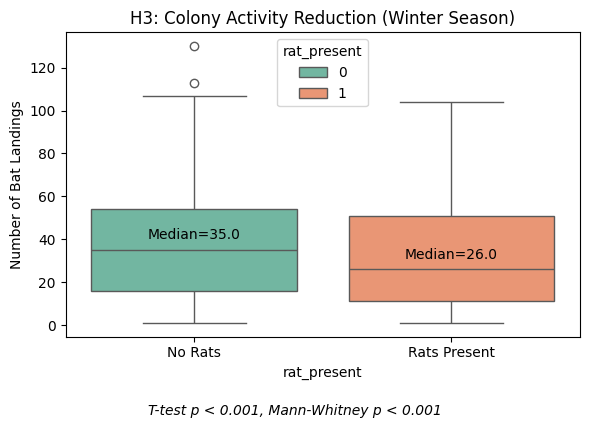

In [264]:
with_rats = winter_season[winter_season['rat_present'] == 1]['bat_landing_number']
without_rats = winter_season[winter_season['rat_present'] == 0]['bat_landing_number']

# Means/medians
mean_no, mean_yes = without_rats.mean(), with_rats.mean()
med_no, med_yes = without_rats.median(), with_rats.median()

# Stats
t_stat, pval_t = ttest_ind(with_rats, without_rats, equal_var=False, nan_policy='omit')
u_stat, pval_u = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

# Boxplot
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='rat_present', y='bat_landing_number',
                 data=winter_season, palette="Set2", hue='rat_present')
plt.xticks([0,1], ['No Rats','Rats Present'])
plt.ylabel("Number of Bat Landings")
plt.title("H3: Colony Activity Reduction (Winter Season)")

# Annotate medians
plt.text(0, med_no+5, f"Median={med_no}", ha='center', color="black")
plt.text(1, med_yes+5, f"Median={med_yes}", ha='center', color="black")

# Annotate p-values
plt.figtext(0.5, -0.05, f"T-test p < 0.001, Mann-Whitney p < 0.001",
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

In [265]:
print(f"T-test result:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {pval_t:.4f}")
print("="*50)
print("Mann–Whitney U test result:")
print(f"  U-statistic = {u_stat:.4f}")
print(f"  p-value     = {pval_u:.4f}")

T-test result:
  t-statistic = -1.2157
  p-value     = 0.2268
Mann–Whitney U test result:
  U-statistic = 31346.5000
  p-value     = 0.1217


**Conclusion (Winter):**
The p-value from the Mann-Whitney U test is greater than 0.05. Therefore, we **fail to reject the null hypothesis**. There is no statistically significant evidence that rat presence reduces the number of bat landings during the winter.

### H3: Colony Activity Reduction (Spring)
**Hypothesis:** The presence of rats reduces overall bat colony activity, measured by the number of bat landings.
- **Null Hypothesis (H₀):** The mean number of bat landings is the same whether rats are present or not.
- **Alternative Hypothesis (H₁):** The mean number of bat landings is lower when rats are present.

**Test:** Mann-Whitney U test and T-test on `bat_landing_number`.

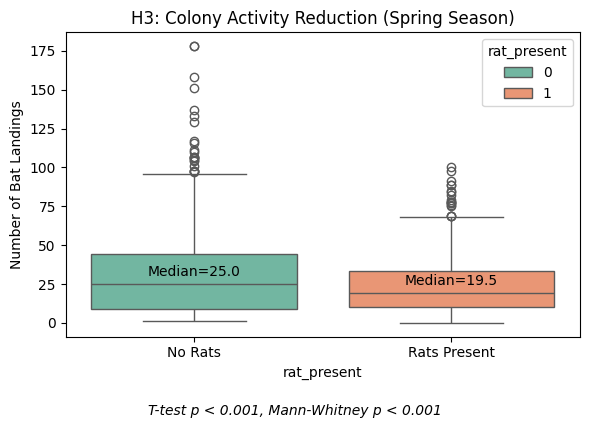

In [266]:
with_rats = spring_season[spring_season['rat_present'] == 1]['bat_landing_number']
without_rats = spring_season[spring_season['rat_present'] == 0]['bat_landing_number']

# Means/medians
mean_no, mean_yes = without_rats.mean(), with_rats.mean()
med_no, med_yes = without_rats.median(), with_rats.median()

# Stats
t_stat, pval_t = ttest_ind(with_rats, without_rats, equal_var=False, nan_policy='omit')
u_stat, pval_u = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

# Boxplot
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='rat_present', y='bat_landing_number',
                 data=spring_season, palette="Set2", hue='rat_present')
plt.xticks([0,1], ['No Rats','Rats Present'])
plt.ylabel("Number of Bat Landings")
plt.title("H3: Colony Activity Reduction (Spring Season)")

# Annotate medians
plt.text(0, med_no+5, f"Median={med_no}", ha='center', color="black")
plt.text(1, med_yes+5, f"Median={med_yes}", ha='center', color="black")

# Annotate p-values
plt.figtext(0.5, -0.05, f"T-test p < 0.001, Mann-Whitney p < 0.001",
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

In [267]:
print(f"T-test result:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {pval_t:.4f}")
print("="*50)
print("Mann–Whitney U test result:")
print(f"  U-statistic = {u_stat:.4f}")
print(f"  p-value     = {pval_u:.4f}")

T-test result:
  t-statistic = -4.2561
  p-value     = 0.0000
Mann–Whitney U test result:
  U-statistic = 146678.0000
  p-value     = 0.0050


**Conclusion (Spring):**
The p-value from the Mann-Whitney U test is less than 0.05. Therefore, we **reject the null hypothesis**. There is statistically significant evidence that rat presence reduces the number of bat landings during the spring.

Text(0, 0.5, 'Average Number of Bat Landings')

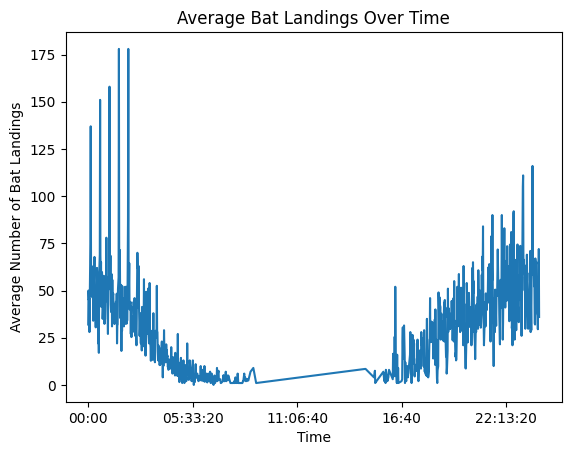

In [268]:

ax = df2.groupby(df2['time'].dt.time)['bat_landing_number'].mean().plot()

ax.set_title('Average Bat Landings Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Average Number of Bat Landings')

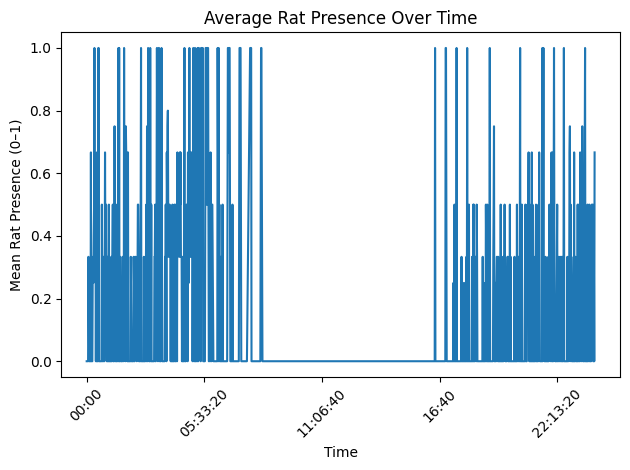

In [269]:
ax = df2.groupby(df2['time'].dt.time)['rat_present'].mean().plot()

ax.set_title('Average Rat Presence Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Mean Rat Presence (0–1)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Food Availability')

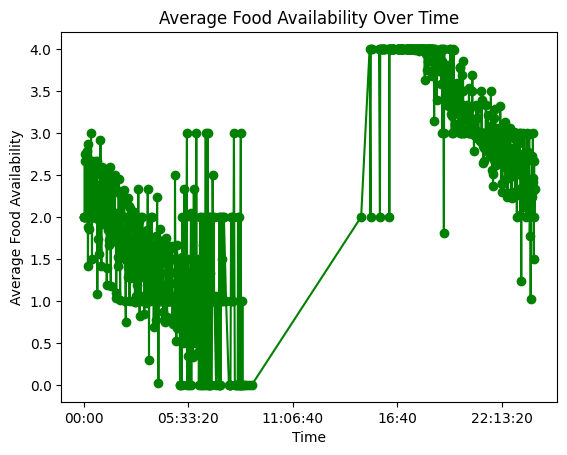

In [270]:
grouped = df2.groupby(df2['time'].dt.time)['food_availability'].mean()
ax = grouped.plot(marker='o', color='green')

ax.set_title('Average Food Availability Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Average Food Availability')

In [271]:
df2.corr(numeric_only=True)

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present,season
month,1.000000,-0.060454,-0.158037,0.063228,0.200732,0.207742,0.265942,0.901932
hours_after_sunset,-0.060454,1.000000,-0.142074,-0.841611,0.123417,0.085692,0.110990,-0.062040
bat_landing_number,-0.158037,-0.142074,1.000000,0.104762,-0.146228,-0.073536,-0.119756,-0.153591
food_availability,0.063228,-0.841611,0.104762,1.000000,-0.055910,-0.033639,-0.067623,0.071094
rat_minutes,0.200732,0.123417,-0.146228,-0.055910,1.000000,0.585241,0.548827,0.189011
rat_arrival_number,0.207742,0.085692,-0.073536,-0.033639,0.585241,1.000000,0.704341,0.170120
rat_present,0.265942,0.110990,-0.119756,-0.067623,0.548827,0.704341,1.000000,0.241383
season,0.901932,-0.062040,-0.153591,0.071094,0.189011,0.170120,0.241383,1.000000


In [272]:
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present,season
0,2017-12-26 16:13:00,0,-0.5,20,4.000000,0.0,0,0,0
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0,0
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0,0
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0,0
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
2118,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0,1
2119,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0,1
2120,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0,1
2121,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0,1


In [273]:
y = df2['bat_landing_number']
X = df2.drop(['bat_landing_number','time'],axis=1)

<Axes: ylabel='bat_landing_number'>

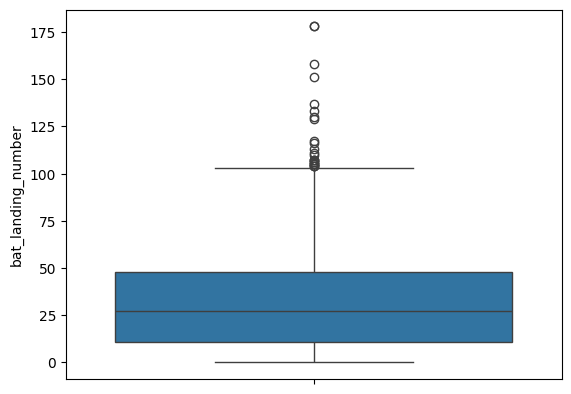

In [274]:
sns.boxplot(y= 'bat_landing_number', data=df2)

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [276]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [277]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2 Score:", r2)

MSE: 660.0632572858917
R^2 Score: 0.054159059763325135


In [278]:
data_1 = dataset1[['start_time','bat_landing_to_food','rat_period_start','rat_period_end','seconds_after_rat_arrival']]

In [279]:
data_1['rat_period_start'] = pd.to_datetime(data_1['rat_period_start'])
data_1['rat_period_end'] = pd.to_datetime(data_1['rat_period_end'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_51252\3463379413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['rat_period_start'] = pd.to_datetime(data_1['rat_period_start'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_51252\3463379413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['rat_period_end'] = pd.to_datetime(data_1['rat_period_end'])


In [280]:
data_1['bat_landed'] = data_1['rat_period_start'] + pd.to_timedelta(data_1['seconds_after_rat_arrival'], unit='s')

C:\Users\Acer\AppData\Local\Temp\ipykernel_51252\522847076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['bat_landed'] = data_1['rat_period_start'] + pd.to_timedelta(data_1['seconds_after_rat_arrival'], unit='s')


In [281]:
data_1

,start_time,bat_landing_to_food,rat_period_start,rat_period_end,seconds_after_rat_arrival,bat_landed
0,2017-12-30 18:37:00,16.000000,2017-12-30 18:35:00,2017-12-30 18:38:00,108,2017-12-30 18:36:48
1,2017-12-30 19:51:00,0.074016,2017-12-30 19:50:00,2017-12-30 19:55:00,17,2017-12-30 19:50:17
2,2017-12-30 19:51:00,4.000000,2017-12-30 19:50:00,2017-12-30 19:55:00,41,2017-12-30 19:50:41
3,2017-12-30 19:52:00,10.000000,2017-12-30 19:50:00,2017-12-30 19:55:00,111,2017-12-30 19:51:51
4,2017-12-30 19:54:00,15.000000,2017-12-30 19:50:00,2017-12-30 19:55:00,194,2017-12-30 19:53:14
...,...,...,...,...,...,...
902,2018-05-04 04:18:00,2.000000,2018-05-04 04:14:00,2018-05-04 04:30:00,224,2018-05-04 04:17:44
903,2018-05-04 04:18:00,1.000000,2018-05-04 04:14:00,2018-05-04 04:30:00,275,2018-05-04 04:18:35
904,2018-05-04 04:19:00,22.000000,2018-05-04 04:14:00,2018-05-04 04:30:00,310,2018-05-04 04:19:10
905,2018-05-03 23:51:00,2.000000,2018-05-03 23:46:00,2018-05-03 23:52:00,339,2018-05-03 23:51:39


<Axes: xlabel='rat_present'>

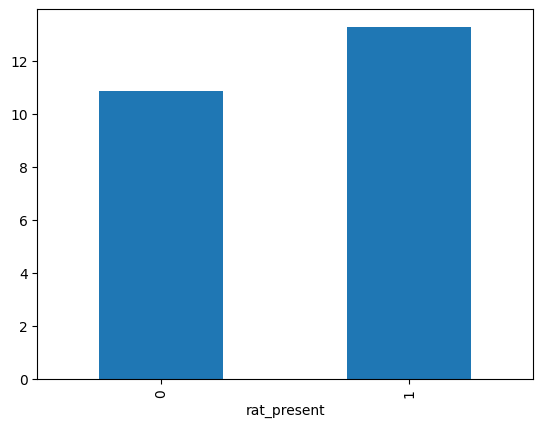

In [282]:
dataset1.groupby('rat_present')['bat_landing_to_food'].mean().plot(kind = 'bar')

In [283]:
linear_df = dataset1.drop(columns = ['start_time','rat_period_start','rat_period_end','seconds_after_rat_arrival','sunset_time'])

# Feature Engineering and Model Building

# Encoding

In [284]:
linear_df.dtypes

bat_landing_to_food    float64
habit                   object
risk                     int64
reward                   int64
month                    int64
hours_after_sunset     float64
season                   int64
avoidance_behavior       int64
interaction_type        object
rat_present              int64
dtype: object

In [285]:
linear_df.habit.unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', 'unknown',
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eati

In [286]:
def categorize_habit(habit):
    # Category 1: Single Animal Actions
    single_actions = ['rat', 'bat', 'pick', 'fast', 'bats', 'no_food', 'unknown', 'gaze', 'both', 'bowl_out']

    # Category 2: Multiple Animal Interactions
    multiple_interactions_keywords = ['and', 'fight', 'attack', 'rat_pick', 'pick_rat', 'bat_pick', 'bat_rat']

    # Category 3: Eating / Feeding Actions
    eating_keywords = ['eating', 'reward', 'pick_and_all', 'eating_and', 'pick_eating_all', 'eating_bat']

    # Category 4: Coordinates / Spatial Data
    if ';' in habit or any(char.isdigit() for char in habit):
        return 'Coordinates'

    # Category 5: Uncertain / Other
    uncertain_keywords = ['other', 'unknown', 'not_sure', 'pup_and_mon', 'other_bats', 'others']

    # Logic to assign category
    if habit in single_actions:
        return habit
    elif any(keyword in habit for keyword in multiple_interactions_keywords):
        return 'Multiple Interaction'
    elif any(keyword in habit for keyword in eating_keywords):
        return 'Eating/Feeding'
    elif any(keyword in habit for keyword in uncertain_keywords):
        return 'Uncertain/Other'
    else:
        return 'Other'

In [287]:
linear_df.habit = linear_df.habit.apply(categorize_habit)

In [288]:
linear_df.interaction_type.unique()

array(['predation_fear', 'no_rat'], dtype=object)

In [289]:
le = LabelEncoder()
oh = OneHotEncoder()

In [290]:
linear_df.habit = le.fit_transform(linear_df.habit)

In [291]:
linear_df.interaction_type = linear_df.interaction_type.astype('category').cat.codes

In [292]:
linear_df

,bat_landing_to_food,habit,risk,reward,month,hours_after_sunset,season,avoidance_behavior,interaction_type,rat_present
0,16.000000,13,1,0,0,1.870833,0,1,1,1
1,0.074016,9,0,1,0,3.100833,0,0,0,0
2,4.000000,9,0,1,0,3.107500,0,0,0,0
3,10.000000,13,1,0,0,3.126944,0,1,1,1
4,15.000000,13,1,0,0,3.150000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
902,2.000000,13,1,0,5,8.933333,1,0,1,1
903,1.000000,9,0,1,5,8.947500,1,0,0,0
904,22.000000,12,0,1,5,8.957222,1,1,0,0
905,2.000000,9,0,1,5,4.498889,1,0,0,0


# Season Split 

In [293]:
winter_df = linear_df[linear_df['season'] == 0]
spring_df = linear_df[linear_df['season'] == 1]

# Scaling value

In [294]:
scaler = StandardScaler()

# Winter 
### Log Transformation

In [295]:
y = np.log1p(winter_df['bat_landing_to_food'])
X = winter_df.drop(columns = 'bat_landing_to_food')

In [296]:
X.shape, y.shape

((151, 9), (151,))

In [297]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Transformation and Encoding Pipeline

In [298]:
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

In [299]:
transformer = ColumnTransformer([
    ('num', scaler, num_cols),
    ('cat', oh, cat_cols)
], remainder='passthrough')

In [300]:
X_train_scaled = transformer.fit_transform(X_train)
X_test_scaled = transformer.transform(X_test)

In [301]:
X_train_scaled

array([[ 0.92270594, -1.16316   , -0.73379939, ..., -0.60302269,
        -1.05131497,  0.        ],
       [-0.511552  , -1.16316   ,  1.36277029, ..., -0.60302269,
        -1.05131497,  0.        ],
       [ 0.34900277, -1.16316   ,  1.36277029, ...,  1.6583124 ,
        -1.05131497,  0.        ],
       ...,
       [-2.51951311,  0.85972695, -0.73379939, ..., -0.60302269,
         0.95118973,  1.        ],
       [ 0.63585435,  0.85972695, -0.73379939, ...,  1.6583124 ,
         0.95118973,  1.        ],
       [ 0.63585435,  0.85972695, -0.73379939, ...,  1.6583124 ,
         0.95118973,  1.        ]], shape=(120, 9))

# Linear Regression Model

# Winter Season Model

In [302]:
y_winter = np.log1p(winter_df['bat_landing_to_food'])
X_winter = winter_df.drop(columns='bat_landing_to_food')

In [303]:

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_winter, y_winter, test_size=0.2, random_state=42
)

# Scale winter data

In [304]:
num_cols = X_winter.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_winter.select_dtypes(include=['object', 'category']).columns

In [305]:
transformer_w = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
], remainder='passthrough')

In [306]:
X_train_w_scaled = transformer_w.fit_transform(X_train_w)
X_test_w_scaled = transformer_w.transform(X_test_w)

# Train winter model

In [307]:
model_winter = LinearRegression()
model_winter.fit(X_train_w_scaled, y_train_w)
y_test_pred_winter = model_winter.predict(X_test_w_scaled)
y_train_pred_winter = model_winter.predict(X_train_w_scaled)

In [308]:
# Training metrics
r2_train_winter = r2_score(y_train_w, y_train_pred_winter)
mse_train_winter = mean_squared_error(y_train_w, y_train_pred_winter)
rmse_train_winter = np.sqrt(mse_train_winter)

# Test metrics
r2_test_winter = r2_score(y_test_w, y_test_pred_winter)
mse_test_winter = mean_squared_error(y_test_w, y_test_pred_winter)
rmse_test_winter = np.sqrt(mse_test_winter)

In [309]:
# Cross-validation for winter

In [310]:
cv_scores_winter = cross_val_score(model_winter, X_train_w_scaled, y_train_w, cv=3)

# WINTER SEASON MODEL PERFORMANCE

In [311]:
print(f"R² (Train):             {r2_train_winter:.4f}")
print(f"R² (Test):              {r2_test_winter:.4f}")
print(f"MSE (Train):            {mse_train_winter:.4f}")
print(f"MSE (Test):             {mse_test_winter:.4f}")
print(f"RMSE (Train):           {rmse_train_winter:.4f}")
print(f"RMSE (Test):            {rmse_test_winter:.4f}")
print(f"Cross-Val R² (mean):    {cv_scores_winter.mean():.4f} (±{cv_scores_winter.std():.4f})")
print(f"Sample size:            {len(winter_df)}")

R² (Train):             0.7144
R² (Test):              0.5993
MSE (Train):            0.2195
MSE (Test):             0.5347
RMSE (Train):           0.4685
RMSE (Test):            0.7312
Cross-Val R² (mean):    0.6108 (±0.0417)
Sample size:            151


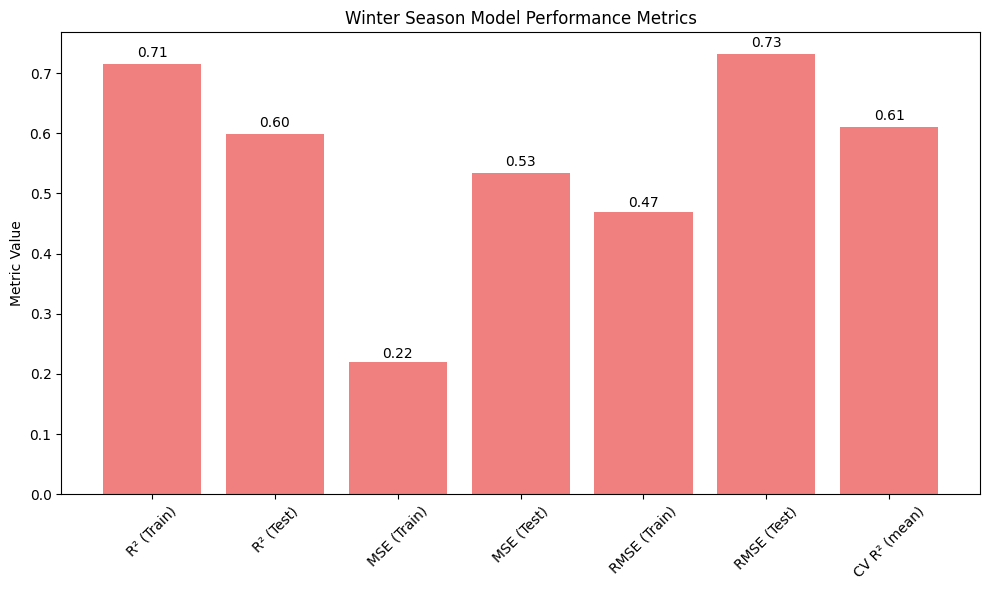

In [312]:
# Calculate and store metrics
winter_metrics = {
    'Metric': [
        'R² (Train)', 
        'R² (Test)', 
        'MSE (Train)', 
        'MSE (Test)', 
        'RMSE (Train)', 
        'RMSE (Test)', 
        'CV R² (mean)'
    ],
    'Value': [
        r2_train_winter, 
        r2_test_winter, 
        mse_train_winter, 
        mse_test_winter, 
        rmse_train_winter, 
        rmse_test_winter, 
        cv_scores_winter.mean()
    ]
}

# Create DataFrame for plotting
df_winter_plot = pd.DataFrame(winter_metrics)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_winter_plot['Metric'], df_winter_plot['Value'], color='lightcoral')

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 0.01 * abs(yval), 
        f'{yval:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.title("Winter Season Model Performance Metrics")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [313]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_winter.coef_
}).sort_values(by='Coefficient', ascending=False)
coef_df

,Feature,Coefficient
6,avoidance_behavior,7.229122e-01
1,risk,1.170471e-01
0,habit,7.993687e-02
4,hours_after_sunset,4.521857e-02
2,reward,2.709780e-02
5,season,1.387779e-17
8,rat_present,-2.420212e-02
7,interaction_type,-4.846485e-02
3,month,-5.760433e-02


Visualization off features importance

C:\Users\Acer\AppData\Local\Temp\ipykernel_51252\3983116570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


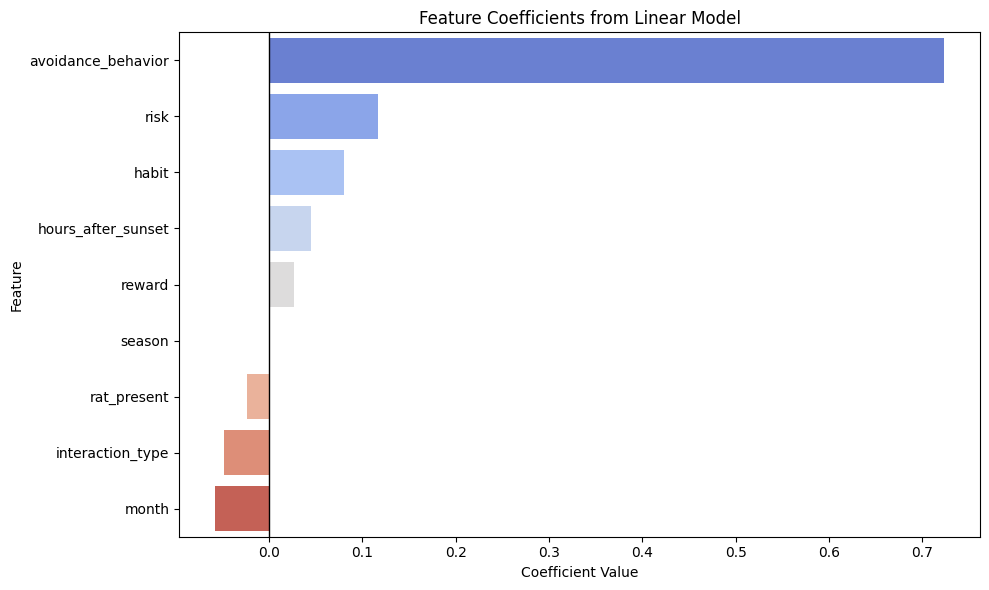

In [314]:

plt.figure(figsize=(10,6))
sns.barplot(
    data=coef_df,
    x='Coefficient',
    y='Feature',
    palette='coolwarm'
)
plt.title('Feature Coefficients from Linear Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

# Spring Season Model

In [315]:
y_spring = np.log1p(spring_df['bat_landing_to_food'])
X_spring = spring_df.drop(columns='bat_landing_to_food')

In [316]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_spring, y_spring, test_size=0.2, random_state=42
)

In [317]:
transformer_s = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
], remainder='passthrough')

In [318]:
X_train_s_scaled = transformer_s.fit_transform(X_train_s)
X_test_s_scaled = transformer_s.transform(X_test_s)

# Train spring model

In [319]:
model_spring = LinearRegression()
model_spring.fit(X_train_s_scaled, y_train_s)
y_test_pred_spring = model_spring.predict(X_test_s_scaled)
y_train_pred_spring = model_spring.predict(X_train_s_scaled)

# Metrics for spring

In [320]:
# Training metrics
r2_train_spring = r2_score(y_train_s, y_train_pred_spring)
mse_train_spring = mean_squared_error(y_train_s, y_train_pred_spring)
rmse_train_spring = np.sqrt(mse_train_spring)

# Test metrics
r2_test_spring = r2_score(y_test_s, y_test_pred_spring)
mse_test_spring = mean_squared_error(y_test_s, y_test_pred_spring)
rmse_test_spring = np.sqrt(mse_test_spring)

# Cross-validation for spring

In [321]:
cv_scores_spring = cross_val_score(model_spring, X_train_s_scaled, y_train_s, cv=3)

# SPRING SEASON MODEL PERFORMANCE

In [322]:
print(f"R² (Train):             {r2_train_spring:.4f}")
print(f"R² (Test):              {r2_test_spring:.4f}")
print(f"MSE (Train):            {mse_train_spring:.4f}")
print(f"MSE (Test):             {mse_test_spring:.4f}")
print(f"RMSE (Train):           {rmse_train_spring:.4f}")
print(f"RMSE (Test):            {rmse_test_spring:.4f}")
print(f"Cross-Val R² (mean):    {cv_scores_spring.mean():.4f} (±{cv_scores_spring.std():.4f})")
print(f"Sample size:            {len(spring_df)}")
print()

R² (Train):             0.7074
R² (Test):              0.6306
MSE (Train):            0.4442
MSE (Test):             0.4787
RMSE (Train):           0.6665
RMSE (Test):            0.6919
Cross-Val R² (mean):    0.7034 (±0.0116)
Sample size:            756



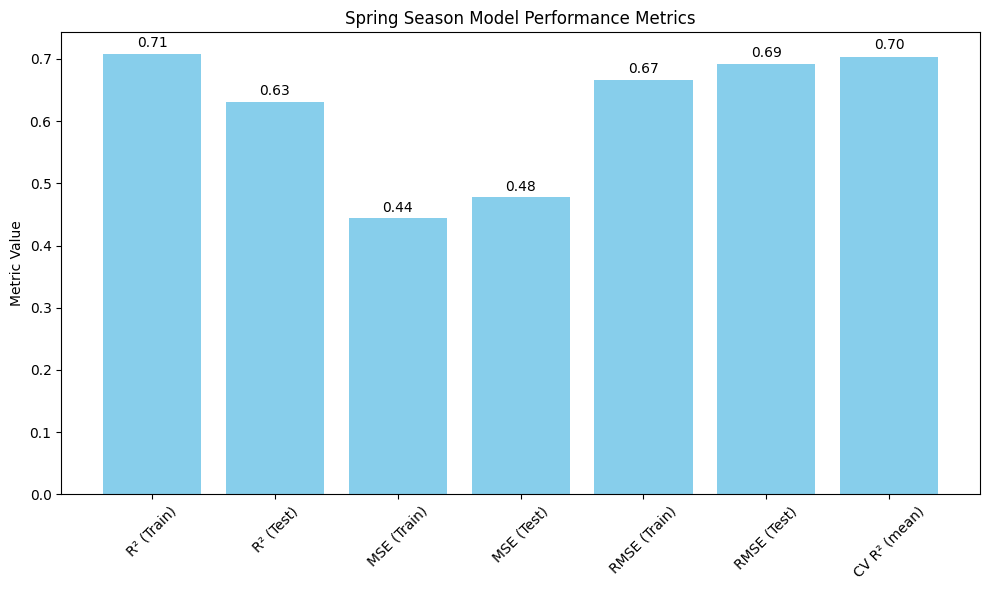

In [323]:
spring_metrics = {
    'Metric': [
        'R² (Train)', 
        'R² (Test)', 
        'MSE (Train)', 
        'MSE (Test)', 
        'RMSE (Train)', 
        'RMSE (Test)', 
        'CV R² (mean)'
    ],
    'Value': [
        r2_train_spring, 
        r2_test_spring, 
        mse_train_spring, 
        mse_test_spring, 
        rmse_train_spring, 
        rmse_test_spring, 
        cv_scores_spring.mean()
    ]
}

df_spring_plot = pd.DataFrame(spring_metrics)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_spring_plot['Metric'], df_spring_plot['Value'], color='skyblue')

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 0.01 * abs(yval), 
        f'{yval:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.title("Spring Season Model Performance Metrics")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Comparison of Winter and SPring Models

In [324]:
comparison_df = pd.DataFrame({
    'Season': ['Winter (0)', 'Spring (1)'],
    'R² Train': [r2_train_winter, r2_train_spring],
    'R² Test': [r2_test_winter, r2_test_spring],
    'MSE Train': [mse_train_winter, mse_train_spring],
    'MSE Test': [mse_test_winter, mse_test_spring],
    'RMSE Train': [rmse_train_winter, rmse_train_spring],
    'RMSE Test': [rmse_test_winter, rmse_test_spring],
    'CV R² Mean': [cv_scores_winter.mean(), cv_scores_spring.mean()],
    'Sample Size': [len(winter_df), len(spring_df)]
})

comparison_df_without_sample_size = pd.DataFrame({
    'Season': ['Winter (0)', 'Spring (1)'],
    'R² Train': [r2_train_winter, r2_train_spring],
    'R² Test': [r2_test_winter, r2_test_spring],
    'MSE Train': [mse_train_winter, mse_train_spring],
    'MSE Test': [mse_test_winter, mse_test_spring],
    'RMSE Train': [rmse_train_winter, rmse_train_spring],
    'RMSE Test': [rmse_test_winter, rmse_test_spring],
    'CV R² Mean': [cv_scores_winter.mean(), cv_scores_spring.mean()],
})

In [325]:
print(comparison_df.to_string(index=False))

    Season  R² Train  R² Test  MSE Train  MSE Test  RMSE Train  RMSE Test  CV R² Mean  Sample Size
Winter (0)  0.714447 0.599288   0.219496  0.534662    0.468504   0.731206    0.610773          151
Spring (1)  0.707350 0.630617   0.444184  0.478732    0.666472   0.691905    0.703425          756


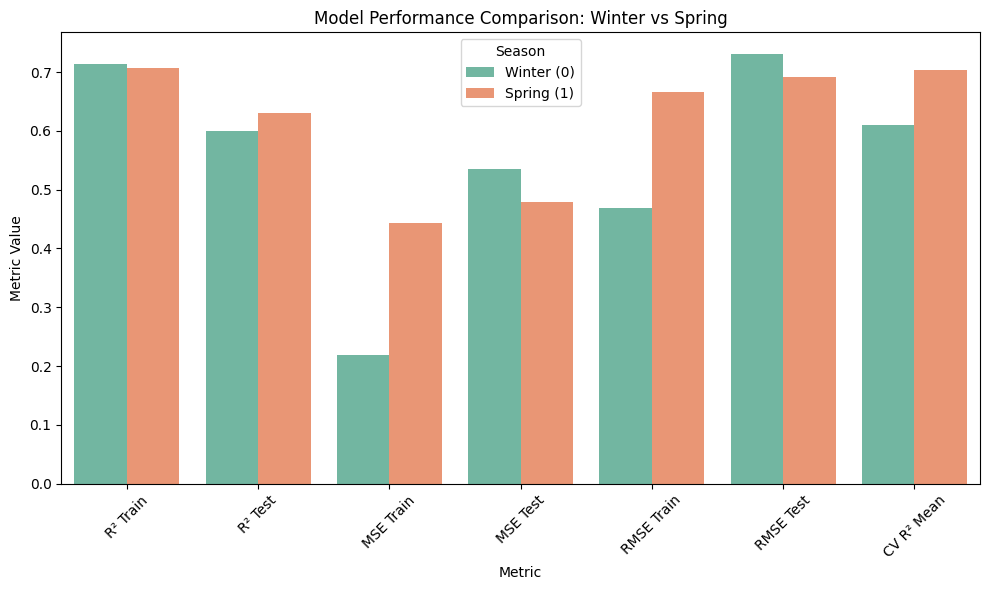

In [326]:
plot_df = comparison_df_without_sample_size.melt(id_vars='Season', var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Value', hue='Season', data=plot_df, palette='Set2')

plt.title("Model Performance Comparison: Winter vs Spring")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

If else statement for determining the best season model

In [327]:
# Compare test R² scores to determine best model
if r2_test_winter > r2_test_spring:
    diff = r2_test_winter - r2_test_spring
    print(f"✓ WINTER season has BETTER predictive performance")
    print(f"  R² Test difference: {diff:.4f} ({diff*100:.2f}% better)")
else:
    diff = r2_test_spring - r2_test_winter
    print(f"✓ SPRING season has BETTER predictive performance")
    print(f"  R² Test difference: {diff:.4f} ({diff*100:.2f}% better)")


✓ SPRING season has BETTER predictive performance
  R² Test difference: 0.0313 (3.13% better)


# Visualization: R² Comparison

In [328]:
seasons = ['Winter', 'Spring']
colors = ['#3498db', '#2ecc71']

# 1. R² Score Comparison

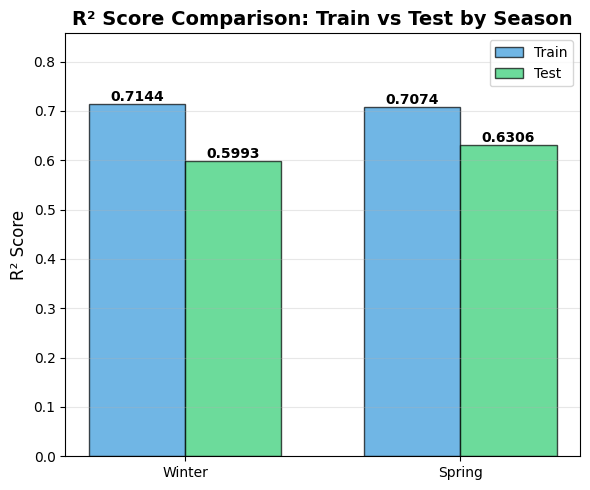

In [329]:
plt.figure(figsize=(6, 5))
r2_train_values = [r2_train_winter, r2_train_spring]
r2_test_values = [r2_test_winter, r2_test_spring]

x = np.arange(len(seasons))
width = 0.35

bars1 = plt.bar(x - width/2, r2_train_values, width, label='Train', color='#3498db', alpha=0.7, edgecolor='black')
bars2 = plt.bar(x + width/2, r2_test_values, width, label='Test', color='#2ecc71', alpha=0.7, edgecolor='black')

plt.ylabel('R² Score', fontsize=12)
plt.title('R² Score Comparison: Train vs Test by Season', fontsize=14, fontweight='bold')
plt.xticks(x, seasons)
plt.legend()
plt.ylim(0, max(r2_train_values + r2_test_values) * 1.2)
plt.grid(axis='y', alpha=0.3)

# Annotate train values
for bar, val in zip(bars1, r2_train_values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

# Annotate test values
for bar, val in zip(bars2, r2_test_values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Mean Squared Error Comparison

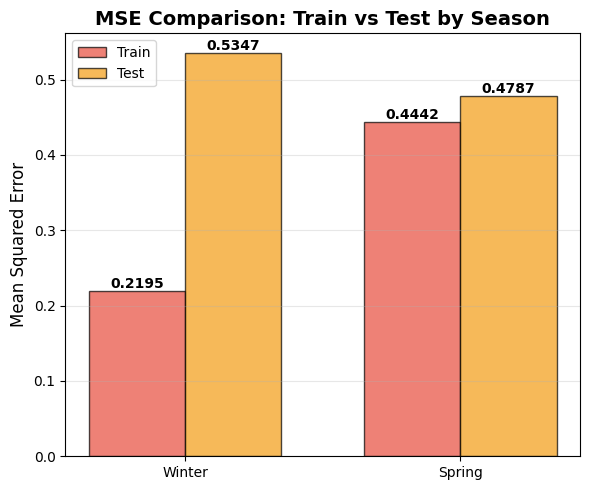

In [330]:
plt.figure(figsize=(6, 5))
mse_train_values = [mse_train_winter, mse_train_spring]
mse_test_values = [mse_test_winter, mse_test_spring]

x = np.arange(len(seasons))
width = 0.35

bars1 = plt.bar(x - width/2, mse_train_values, width, label='Train', color='#e74c3c', alpha=0.7, edgecolor='black')
bars2 = plt.bar(x + width/2, mse_test_values, width, label='Test', color='#f39c12', alpha=0.7, edgecolor='black')

plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('MSE Comparison: Train vs Test by Season', fontsize=14, fontweight='bold')
plt.xticks(x, seasons)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Annotate train values
for bar, val in zip(bars1, mse_train_values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

# Annotate test values
for bar, val in zip(bars2, mse_test_values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# 3. Root Mean Squared Error Comparison

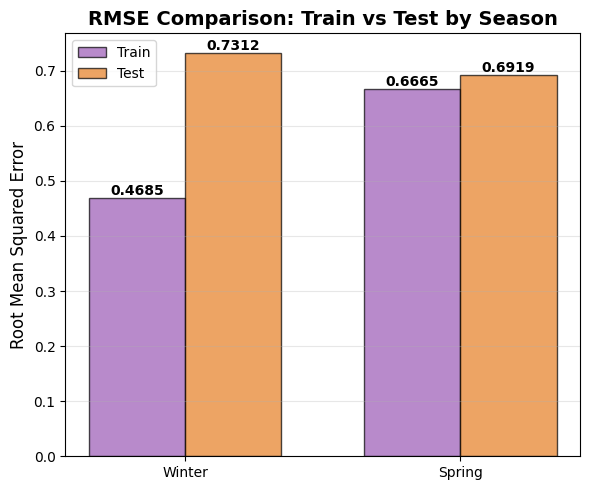

In [331]:
plt.figure(figsize=(6, 5))
rmse_train_values = [rmse_train_winter, rmse_train_spring]
rmse_test_values = [rmse_test_winter, rmse_test_spring]

x = np.arange(len(seasons))
width = 0.35

bars1 = plt.bar(x - width/2, rmse_train_values, width, label='Train', color='#9b59b6', alpha=0.7, edgecolor='black')
bars2 = plt.bar(x + width/2, rmse_test_values, width, label='Test', color='#e67e22', alpha=0.7, edgecolor='black')

plt.ylabel('Root Mean Squared Error', fontsize=12)
plt.title('RMSE Comparison: Train vs Test by Season', fontsize=14, fontweight='bold')
plt.xticks(x, seasons)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Annotate train values
for bar, val in zip(bars1, rmse_train_values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

# Annotate test values
for bar, val in zip(bars2, rmse_test_values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Cross-Validation R² Comparison

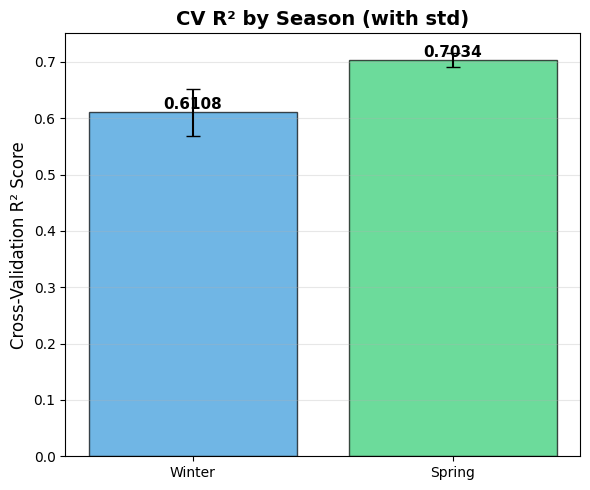

In [332]:
plt.figure(figsize=(6, 5))
cv_means = [cv_scores_winter.mean(), cv_scores_spring.mean()]
cv_stds = [cv_scores_winter.std(), cv_scores_spring.std()]
bars = plt.bar(seasons, cv_means, yerr=cv_stds, color=colors,
               alpha=0.7, edgecolor='black', capsize=5)
plt.ylabel('Cross-Validation R² Score', fontsize=12)
plt.title('CV R² by Season (with std)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Interpretation

**Key Findings:**
- The comparison evaluates Linear Regression model performance on predicting `bat_landing_to_food` for Winter vs Spring seasons
- Higher R² score indicates better predictive power (values closer to 1.0 are better)
- Lower MSE/RMSE indicates better model accuracy
- Cross-validation R² provides a more robust estimate of model performance

**Understanding Train vs Test Metrics:**
- **R² (Train)**: Measures how well the model fits the data it was trained on
- **R² (Test)**: Evaluates how well the model generalizes to unseen data (true performance indicator)
- **MSE/RMSE (Train vs Test)**: Compares prediction errors on training vs test data
- **Large gap between Train and Test**: May indicate overfitting (model learned noise instead of patterns)
- **Similar Train and Test scores**: Indicates good generalization

**Model Evaluation Guidelines:**
| R² Train | R² Test | Interpretation |
|----------|---------|----------------|
| 0.90 | 0.88 | Excellent fit, no overfitting |
| 0.95 | 0.60 | Overfitting (model learned training data too well) |
| 0.50 | 0.48 | Underfitting (model too simple) |

**Factors to Consider:**
1. **Sample Size**: Different sample sizes between seasons may affect model reliability
2. **Data Quality**: Seasonal patterns and behavioral differences may impact prediction accuracy
3. **Feature Importance**: Different features may have varying significance across seasons
4. **Generalization**: Test metrics are more important than training metrics for real-world application